In [4]:
import CM_code.spurious_george as sp
import numpy as np
import pyccl as ccl
import matplotlib.pyplot as plt
import scipy
import importlib as imp
import DL_basis_code.shared_functions_setup as setup
import CM_code.tjp_helper as tjp_helper
import time
from more_itertools import locate

imp.reload(tjp_helper)
imp.reload(sp)

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['cmr10']
plt.rcParams['mathtext.fontset'] ='cm'
plt.rc('axes', unicode_minus=False)
plt.rc('axes.formatter', use_mathtext=True)


print('Lens bin: %g - %g'%(sp.zed.zl_min, sp.zed.zl_max))
print('Source bin: %g - %g'%(sp.zed.zs_min, sp.zed.zs_max))

Lens bin: 0.2 - 1.2
Source bin: 0.05 - 3.5


In [5]:
setup.arcmin_to_rp(20, zleff, sp.zed.cosmo_SRD) * (sp.pa.HH0/100)

10.138759220905907

### First we will consider the full lens and source samples, as this is the case considered in L2018

- We will get xi_gg in the 1h and 2h case to show it's behaviour on scales of 0.1-10 Mpc/h

In [28]:
# get spec-z for lenses
z_l, dndz_l, zleff = sp.zed.get_dndz_spec(gtype='lens', year=1, zlmin=0.4, zlmax=0.6)

# convert redshifts for lenses and sources to scale factors
La_arr = np.flip(1. / (1. + z_l))

#k_arr = np.linspace(1,5E2,3000)
k_arr = np.geomspace(1E-4, 5E4, 4000)

Pk_1h2h = sp.halo.get_Pk2D(corr='gg', k_arr=k_arr, a_arr=La_arr, onehalo=True)
Pk_2h = sp.halo.get_Pk2D(corr='gg', k_arr=k_arr, a_arr=La_arr, onehalo=False)

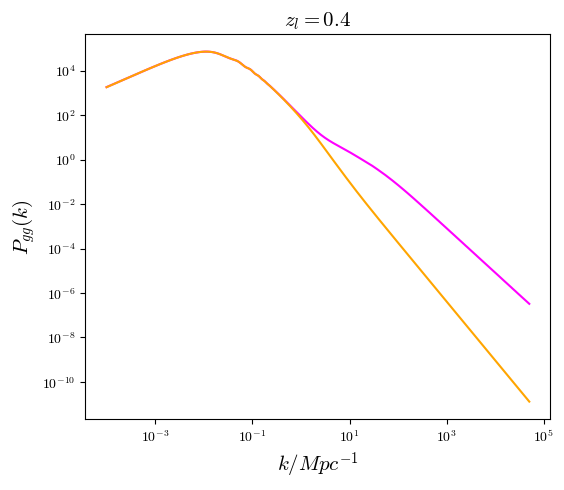

In [32]:
zl = 0
plt.figure(figsize=[6,5])
plt.plot(k_arr, Pk_1h2h.eval(k_arr, np.flip(La_arr)[zl], cosmo=sp.zed.cosmo_SRD), 
         color='magenta')
plt.plot(k_arr, Pk_2h.eval(k_arr, np.flip(La_arr)[zl], cosmo=sp.zed.cosmo_SRD), color='orange')
plt.title(r'$z_{l} = %g$'%(z_l[zl]), fontsize=15)
plt.xlabel(r'$k / Mpc^{-1}$', fontsize=15)
plt.ylabel(r'$P_{gg}(k)$', fontsize=15)
plt.xscale('log')
plt.yscale('log')
#plt.legend(['1h + 2h', '2h only'])

In [33]:
r = np.logspace(np.log10(0.1), np.log10(210), 1000) * (sp.pa.HH0 / 100.)

xi_gg_1h2h = ccl.correlations.correlation_3d(sp.zed.cosmo_SRD, np.flip(La_arr)[zl], 
                                           r / (sp.pa.HH0 / 100.), Pk_1h2h)

xi_gg_2h = ccl.correlations.correlation_3d(sp.zed.cosmo_SRD, np.flip(La_arr)[zl], 
                                           r / (sp.pa.HH0 / 100.), Pk_2h)

theta = sp.theta_cents
theta_long = np.logspace(np.log10(0.1), np.log10(max(theta)),1000)

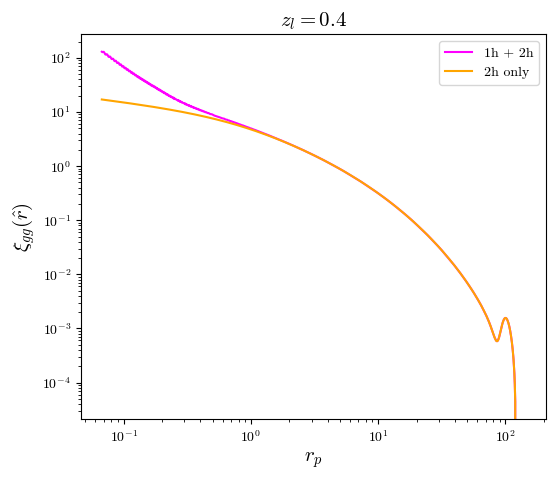

In [34]:
plt.figure(figsize=[6,5])
plt.plot(r, xi_gg_1h2h, 
         color='magenta')
plt.plot(r, xi_gg_2h, color='orange')
plt.title(r'$z_{l} = %g$'%(np.flip(z_l[zl])), fontsize=15)
plt.xlabel(r'$r_p$', fontsize=15)
plt.ylabel(r'$\xi_{gg}(\hat{r})$', fontsize=15)
plt.xscale('log')
plt.yscale('log')
plt.legend(['1h + 2h', '2h only'])

In [116]:
def bin_boost(boost, r, bin_edges):
    
    bindices = np.digitize(r, bin_edges[:-1])
    
    bin_boost = np.zeros([len(bin_edges[:-1])])
    for i in range(len(bin_edges[:-1])):
        
        r_indexes = list(locate(bindices, lambda x: x == i+1))
        bin_boost[i] = np.mean(boost[r_indexes])
        bin_range = r[r_indexes]
        print('Binned in:', min(bin_range), max(bin_range))
        
    return bin_boost

In [102]:
dat = np.arange(300)
theta_long = np.logspace(np.log10(sp.theta_min), np.log10(sp.theta_max), len(z_l))

bin_boost(dat, theta_long, sp.theta_edges)

Binned in: 0.20000000000000004 0.3126150835891633
Binned in: 0.3174672222020419 0.49622521102755396
Binned in: 0.5039271858634031 0.7876761966576977
Binned in: 0.7999018194407331 1.2503068707379428
Binned in: 1.269713043261044 1.9846572457665104
Binned in: 2.0154613641889227 3.1503181141832446
Binned in: 3.199214603722976 5.000613703812649
Binned in: 5.078228867360695 7.937654709274329
Binned in: 8.060856061136107 12.599725956761382
Binned in: 12.795287911496855 20.000000000000004


array([ 14.5,  44.5,  74.5, 104.5, 134.5, 164.5, 194.5, 224.5, 254.5,
       284.5])